In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import os
import pandas as pd
import jellyfish

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 

In [3]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0
ctrl_minus8 = np.zeros((14,12,1015,1359))
ctrl_minus4 = np.zeros((14,12,1015,1359))
ctrl_near0 = np.zeros((14,12,1015,1359))
pgw_near0 = np.zeros((14,12,1015,1359))
near0PGW_near0CTRL = np.zeros((14,12,1015,1359))
near0PGW_m4CTRL = np.zeros((14,12,1015,1359))
near0PGW_m8CTRL = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_minus8CTRL_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f"{fo}/t2m_minus4CTRL_{y}_{m:02d}.p", "rb"))
        aux3 = pickle.load( open(f'{fo}/t2m_near0CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_near0PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_n0PGW_n0CTRL_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_n0PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux7 = pickle.load( open(f'{fo}/t2m_n0PGW_m8CTRL_{y}_{m:02d}.p', 'rb'))
        
        ctrl_minus8[i,m-1] += aux        
        ctrl_minus4[i,m-1] += aux2
        ctrl_near0[i,m-1] += aux3
        pgw_near0[i,m-1] += aux4
        near0PGW_near0CTRL[i,m-1] += aux5
        near0PGW_m4CTRL[i,m-1] += aux6
        near0PGW_m8CTRL[i,m-1] += aux7
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [4]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0
ctrl_minus12 = np.zeros((14,12,1015,1359))
#ctrl_minus8 = np.zeros((14,12,1015,1359))
#ctrl_minus4 = np.zeros((14,12,1015,1359))
pgw_minus4 = np.zeros((14,12,1015,1359))
m4PGW_m4CTRL = np.zeros((14,12,1015,1359))
m4PGW_m8CTRL = np.zeros((14,12,1015,1359))
m4PGW_m12CTRL = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_minus12CTRL_{y}_{m:02d}.p', 'rb'))
        #aux2 = pickle.load( open(f"{fo}/t2m_minus8CTRL_{y}_{m:02d}.p", "rb"))
        #aux3 = pickle.load( open(f'{fo}/t2m_minus4CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_minus4PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_m4PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_m4PGW_m8CTRL_{y}_{m:02d}.p', 'rb'))
        aux7 = pickle.load( open(f'{fo}/t2m_m4PGW_m12CTRL_{y}_{m:02d}.p', 'rb'))
        
        ctrl_minus12[i,m-1] += aux        
        #ctrl_minus8[i,m-1] += aux2
        #ctrl_minus4[i,m-1] += aux3
        pgw_minus4[i,m-1] += aux4
        m4PGW_m4CTRL[i,m-1] += aux5
        m4PGW_m8CTRL[i,m-1] += aux6
        m4PGW_m12CTRL[i,m-1] += aux7
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [5]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0
#ctrl_minus4 = np.zeros((14,12,1015,1359))
#ctrl_near0 = np.zeros((14,12,1015,1359))
ctrl_plus4 = np.zeros((14,12,1015,1359))
pgw_plus4 = np.zeros((14,12,1015,1359))
p4PGW_p4CTRL = np.zeros((14,12,1015,1359))
p4PGW_m4CTRL = np.zeros((14,12,1015,1359))
p4PGW_n0CTRL = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_plus4CTRL_{y}_{m:02d}.p', 'rb'))
        #aux2 = pickle.load( open(f"{fo}/t2m_near0CTRL_{y}_{m:02d}.p", "rb"))
        #aux3 = pickle.load( open(f'{fo}/t2m_minus4CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_plus4PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_p4PGW_p4CTRL_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_p4PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux7 = pickle.load( open(f'{fo}/t2m_p4PGW_n0CTRL_{y}_{m:02d}.p', 'rb'))
        
        ctrl_plus4[i,m-1] += aux        
        #ctrl_near0[i,m-1] += aux2
        #ctrl_minus4[i,m-1] += aux3
        pgw_plus4[i,m-1] += aux4
        p4PGW_p4CTRL[i,m-1] += aux5
        p4PGW_m4CTRL[i,m-1] += aux6
        p4PGW_n0CTRL[i,m-1] += aux7
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [6]:
f = '/home/cruman/Data/CONUS_I/Climate_Historical_Hourly_data/LocalStandardTime'
#provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'ON', 'PE', 'QC', 'SK']

datei = datetime(2000,10,1,0)
datef = datetime(2013,9,30,23)

#arq = open('stations_dist_v4_test.dat', 'w')
#arq.write('CITY;LAT;LON;PEAK1;PEAK2;NEAR0;NEAR0_P01;NEAR0_P02;MEAN;STD;MODEL_MEAN;MODEL_STD;RMSE;BIAS;NEAR0_M;NEAR0_P01_M;NEAR0_P02_M\n')

model = '/home/cruman/Scripts/EventDistributionT2M/CSV'

cities = glob(f'{model}/*CTRL*csv')

for c in np.sort(cities):

    if not 'EDMONTON' in c:
        continue
    
    # Read the CTRL model data from the csv    
    df_m = pd.read_csv(c, index_col=0)
    df_m['Time_CTRL'] = pd.to_datetime(df_m['Time'])        
    df_m['T2 (C) CTRL'] = df_m['T2 (K)'] - 273.15

    # Read the PGW model data from the csv
    m_file=c.split('/')[6][:5]
    model_file_pgw = glob(f'{model}/{m_file}*PGW*csv')   
    print(model_file_pgw)
    df_m_pgw = pd.read_csv(model_file_pgw[0], index_col=0)
    df_m_pgw['Time_PGW'] = pd.to_datetime(df_m_pgw['Time'])        
    df_m_pgw['T2 (C) PGW'] = df_m_pgw['T2 (K)'] - 273.15        

    df_merged = pd.merge(left=df_m, right=df_m_pgw, left_on='Time_CTRL', right_on='Time_PGW')

    sys.exit()
#arq.close()

['/home/cruman/Scripts/EventDistributionT2M/CSV/EDMONTON_INT_L_A_AB_PGW_wrf2d_d01_PGW.csv']


SystemExit: 

/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3435: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
# Calculating the distribution
dist_ctrl = calcDist(df_merged['T2 (C) CTRL'])
dist_pgw = calcDist(df_merged['T2 (C) PGW'])

In [12]:
#Number of occurrences in CTRL and PGW
#-12, -8, -4, 0 and 4C
# 10  11  12  13    14 
print(f"CTRL: -12: {dist_ctrl[10]}, -8: {dist_ctrl[11]}, -4: {dist_ctrl[12]}, 0: {dist_ctrl[13]}, 4: {dist_ctrl[14]}")
print(dist_pgw[10], dist_pgw[11], dist_pgw[12], dist_pgw[13], dist_pgw[14])

CTRL: -12: 5283.0, -8: 6630.0, -4: 10520.0, 0: 14113.0, 4: 11966.0
3109.0 4008.0 6895.0 15500.0 12953.0


In [44]:
np.argmax(dist_ctrl)

13

<BarContainer object of 25 artists>

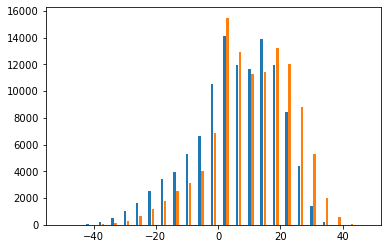

In [42]:
l = np.arange(-50,48,4)
plt.bar(l, dist_ctrl)
plt.bar(l+1, dist_pgw)

In [32]:
df_merged.head()

,Time_x,PR (mm)_x,SN (mm)_x,PSFC (Pa)_x,T2 (K)_x,U10 (m s-1)_x,V10 (m s-1)_x,TD2 (C)_x,Time_CTRL,T2 (C) CTRL,Time_y,PR (mm)_y,SN (mm)_y,PSFC (Pa)_y,T2 (K)_y,U10 (m s-1)_y,V10 (m s-1)_y,TD2 (C)_y,Time_PGW,T2 (C) PGW
0,2000-10-01 00:00:00,0.0,0.0,91815.71,283.78705,5.684257,-3.393955,-3.658727,2000-10-01 00:00:00,10.63705,2000-10-01 00:00:00,0.0,0.0,91913.32,288.9210,5.697483,-3.390016,0.868127,2000-10-01 00:00:00,15.7710
1,2000-10-01 01:00:00,0.0,0.0,91846.97,280.47200,2.882970,-0.826421,1.932367,2000-10-01 01:00:00,7.32200,2000-10-01 01:00:00,0.0,0.0,91964.95,285.4473,2.914898,-0.764360,6.476033,2000-10-01 01:00:00,12.2973
2,2000-10-01 02:00:00,0.0,0.0,91922.02,279.19200,3.353495,-0.695274,1.648844,2000-10-01 02:00:00,6.04200,2000-10-01 02:00:00,0.0,0.0,92032.59,284.1303,3.331297,-0.569215,6.199550,2000-10-01 02:00:00,10.9803
3,2000-10-01 03:00:00,0.0,0.0,91954.44,278.27887,3.079525,-1.026463,1.395786,2000-10-01 03:00:00,5.12887,2000-10-01 03:00:00,0.0,0.0,92054.94,283.1778,3.129930,-0.874681,6.010604,2000-10-01 03:00:00,10.0278
4,2000-10-01 04:00:00,0.0,0.0,92013.23,277.25757,2.755755,-0.619696,1.453479,2000-10-01 04:00:00,4.10757,2000-10-01 04:00:00,0.0,0.0,92109.12,282.2853,2.885039,-0.488993,6.080156,2000-10-01 04:00:00,9.1353


In [34]:
total_ctrl_plus4_month = np.sum(ctrl_plus4, axis=0)
total_ctrl_near0_month = np.sum(ctrl_near0, axis=0)
total_ctrl_minus8_month = np.sum(ctrl_minus8, axis=0)
total_ctrl_minus4_month = np.sum(ctrl_minus4, axis=0)
total_ctrl_minus12_month = np.sum(ctrl_minus12, axis=0)
total_pgw_minus4_month = np.sum(pgw_minus4, axis=0)
total_pgw_plus4_month = np.sum(pgw_plus4, axis=0)
total_pgw_near0_month = np.sum(pgw_near0, axis=0)
total_m4PGW_m4CTRL_month = np.sum(m4PGW_m4CTRL, axis=0)
total_m4PGW_m8CTRL_month = np.sum(m4PGW_m8CTRL, axis=0)
total_m4PGW_m12CTRL_month = np.sum(m4PGW_m12CTRL, axis=0)
total_near0PGW_near0CTRL_month = np.sum(near0PGW_near0CTRL, axis=0)
total_near0PGW_m4CTRL_month = np.sum(near0PGW_m4CTRL, axis=0)
total_near0PGW_m8CTRL_month = np.sum(near0PGW_m8CTRL, axis=0)
total_p4PGW_p4CTRL_month = np.sum(p4PGW_p4CTRL, axis=0)
total_p4PGW_m4CTRL_month = np.sum(p4PGW_m4CTRL, axis=0)
total_p4PGW_n0CTRL_month = np.sum(p4PGW_n0CTRL, axis=0)

total_ctrl_near0 = np.sum(total_ctrl_near0_month, axis=0)
total_ctrl_minus4 = np.sum(total_ctrl_minus4_month, axis=0)
total_ctrl_minus8 = np.sum(total_ctrl_minus8_month, axis=0)
total_ctrl_minus12 = np.sum(total_ctrl_minus12_month, axis=0)
total_pgw_minus4 = np.sum(total_pgw_minus4_month, axis=0)
total_pgw_near0 = np.sum(total_pgw_near0_month, axis=0)
total_pgw_plus4 = np.sum(total_pgw_plus4_month, axis=0)
total_m4PGW_m4CTRL = np.sum(total_m4PGW_m4CTRL_month, axis=0)
total_m4PGW_m8CTRL = np.sum(total_m4PGW_m8CTRL_month, axis=0)
total_m4PGW_m12CTRL = np.sum(total_m4PGW_m12CTRL_month, axis=0)
total_near0PGW_near0CTRL = np.sum(total_near0PGW_near0CTRL_month, axis=0)
total_near0PGW_m4CTRL = np.sum(total_near0PGW_m4CTRL_month, axis=0)
total_near0PGW_m8CTRL = np.sum(total_near0PGW_m8CTRL_month, axis=0)
total_p4PGW_p4CTRL = np.sum(total_p4PGW_p4CTRL_month, axis=0)
total_p4PGW_m4CTRL = np.sum(total_p4PGW_m4CTRL_month, axis=0)
total_p4PGW_n0CTRL = np.sum(total_p4PGW_n0CTRL_month, axis=0)


In [10]:
# Loop thrhought the stations
df_st = pd.read_csv('stations.csv', index_col=0)
# Get the total occurance of the near0, -4 and +4 bin
# Calculate the percentages of each city

In [16]:
aux_df = df_st.loc[(df_st['9st']=='z') | (df_st['9st']=='y') | (df_st['9st']=='x')]

In [42]:
model = '/home/cruman/Scripts/EventDistributionT2M/CSV'
arq = open('perc_stations_model.dat', 'w')
arq.write("StationName,%fromPGWfromMinus4,%fromPGWfrom0,%fromPGWfromPlus4,%fromCTRLstayedMinus4,%fromCTRLstayed0,%fromCTRLstayedPlus4,\n")
for row in aux_df.iterrows():
    #print(row[1])
    name = row[1]['St_Name'].replace(' ', '_')
    lat = float(row[1]['Lat'])
    lon = float(row[1]['Long'])
    cities = glob(f'{model}/{name[:4]}*CTRL*csv')    
    print(name, cities)
    
    # Read the CTRL model data from the csv    
    df_m = pd.read_csv(cities[0], index_col=0)
    df_m['Time_CTRL'] = pd.to_datetime(df_m['Time'])        
    df_m['T2 (C) CTRL'] = df_m['T2 (K)'] - 273.15

    # Read the PGW model data from the csv
    
    cities = glob(f'{model}/{name[:4]}*PGW*csv')        
    df_m_pgw = pd.read_csv(cities[0], index_col=0)
    df_m_pgw['Time_PGW'] = pd.to_datetime(df_m_pgw['Time'])        
    df_m_pgw['T2 (C) PGW'] = df_m_pgw['T2 (K)'] - 273.15        

    df_merged = pd.merge(left=df_m, right=df_m_pgw, left_on='Time_CTRL', right_on='Time_PGW')
    
    dist_ctrl = calcDist(df_merged['T2 (C) CTRL'])
    dist_pgw = calcDist(df_merged['T2 (C) PGW'])
    
    # Getting the indices
    lonlat = np.array([aux1.XLONG.values,aux1.XLAT.values])

    i_ll, j_ll = geo_idx([lon,lat], lonlat)
    
    # % of near0 PGW that came from near0 CTRL divided by the total of near 0 bin
    # same for -4 and +4
    
    a= total_near0PGW_near0CTRL[i_ll, j_ll]
    bin0_ctrl = dist_ctrl[13]
    bin0_pgw = dist_pgw[13]
    
    a2= total_m4PGW_m4CTRL[i_ll, j_ll]
    binm4_ctrl = dist_ctrl[12]
    binm4_pgw = dist_pgw[12]
    
    a1= total_p4PGW_p4CTRL[i_ll, j_ll]
    binp4_ctrl = dist_ctrl[14]
    binp4_pgw = dist_pgw[14]
    
    arq.write(f"{name},{(a2*100/binm4_pgw):.2f},{(a*100/bin0_pgw):.2f},{(a1*100/binp4_pgw):.2f},{(a2*100/bin0_ctrl):.2f},{(a*100/bin0_ctrl):.2f},{(a1*100/bin0_ctrl):.2f},\n")
    #print(f"0: {(a*100/bin0_ctrl):.2f}, -4: {(a2*100/binm4_ctrl):.2f}, +4: {(a1*100/binp4_ctrl):.2f}")    
    #print(f"0: {(a*100/bin0_pgw):.2f}, -4: {(a2*100/binm4_pgw):.2f}, +4: {(a1*100/binp4_pgw):.2f}")    
        
arq.close()

VICTORIA_INT'L_A ["/home/cruman/Scripts/EventDistributionT2M/CSV/VICTORIA_INT'L_A_BC_CTRL_wrf2d_d01_CTRL.csv"]
PORT_HARDY_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/PORT_HARDY_A_BC_CTRL_wrf2d_d01_CTRL.csv']
WILLIAMS_LAKE_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/WILLIAMS_LAKE_A_BC_CTRL_wrf2d_d01_CTRL.csv']
VANCOUVER_INT'L_A ["/home/cruman/Scripts/EventDistributionT2M/CSV/VANCOUVER_INT'L_A_BC_CTRL_wrf2d_d01_CTRL.csv"]
CRANBROOK_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/CRANBROOK_A_BC_CTRL_wrf2d_d01_CTRL.csv']
KAMLOOPS_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/KAMLOOPS_A_BC_CTRL_wrf2d_d01_CTRL.csv']
EDMONTON_INT'L_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/EDMONTON_INT_L_A_AB_CTRL_wrf2d_d01_CTRL.csv']
CALGARY_INT'L_A ["/home/cruman/Scripts/EventDistributionT2M/CSV/CALGARY_INT'L_A_AB_CTRL_wrf2d_d01_CTRL.csv"]
GRANDE_PRAIRIE_A ['/home/cruman/Scripts/EventDistributionT2M/CSV/GRANDE_PRAIRIE_A_AB_CTRL_wrf2d_d01_CTRL.csv']
COLD_LAKE_A ['/home/cruman/Script

In [14]:
# Edmonton
lat = 53.32
lon = -113.58

lonlat = np.array([aux1.XLONG.values,aux1.XLAT.values])

i_ll, j_ll = geo_idx([lon,lat], lonlat)

In [54]:
pgw_a = total_pgw_minus4[i_ll, j_ll]
pgw_b = total_pgw_near0[i_ll, j_ll]
pgw_c = total_pgw_plus4[i_ll, j_ll]

In [15]:
a= total_near0PGW_near0CTRL[i_ll, j_ll]
b= total_near0PGW_m4CTRL[i_ll, j_ll]
c= total_near0PGW_m8CTRL[i_ll, j_ll]

a1= total_p4PGW_p4CTRL[i_ll, j_ll]
b1= total_p4PGW_n0CTRL[i_ll, j_ll]
c1= total_p4PGW_m4CTRL[i_ll, j_ll]


a2= total_m4PGW_m4CTRL[i_ll, j_ll]
b2= total_m4PGW_m8CTRL[i_ll, j_ll]
c2= total_m4PGW_m12CTRL[i_ll, j_ll]

In [16]:
print(f"near 0 in PGW from near 0 in CTRL: {a}")
print(f"near 0 in PGW from -4 in CTRL: {b}")
print(f"near 0 in PGW from -8 in CTRL: {c}")

print(f"+4 PGW from +4 in CTRL: {a1}")
print(f"+4 in PGW from near 0 in CTRL: {b1}")
print(f"+4 in PGW from -4 in CTRL: {c1}")

print(f"-4 in PGW from -4 in CTRL: {a2}")
print(f"-4 in PGW from -8 in CTRL: {b2}")
print(f"-4 in PGW from -12 in CTRL: {c2}")

near 0 in PGW from near 0 in CTRL: 2520.0
near 0 in PGW from -4 in CTRL: 7993.0
near 0 in PGW from -8 in CTRL: 4503.0
+4 PGW from +4 in CTRL: 1447.0
+4 in PGW from near 0 in CTRL: 9522.0
+4 in PGW from -4 in CTRL: 1705.0
-4 in PGW from -4 in CTRL: 605.0
-4 in PGW from -8 in CTRL: 3949.0
-4 in PGW from -12 in CTRL: 1686.0


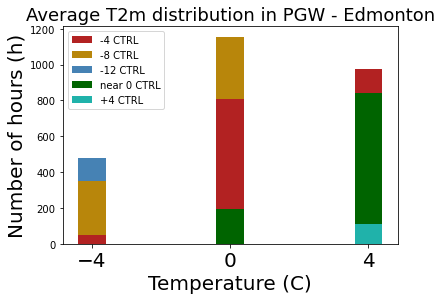

In [44]:
plt.bar(-4, a2, label='-4 CTRL', color='firebrick')
plt.bar(-4, b2, bottom=a2, label='-8 CTRL', color='darkgoldenrod')
plt.bar(-4, c2, bottom=a2+b2, label='-12 CTRL', color='steelblue')
plt.bar(0, a, label='near 0 CTRL', color='darkgreen')
plt.bar(0, b, bottom=a, color='firebrick')
plt.bar(0, c, bottom=a+b, color='darkgoldenrod')
plt.bar(4, a1, label='+4 CTRL', color='lightseagreen')
plt.bar(4, b1, bottom=a1, color='darkgreen')
plt.bar(4, c1, bottom=a1+b1, color='firebrick')
plt.xlabel('Temperature (C)', fontsize=20)
plt.ylabel('Number of hours (h)', fontsize=20)
plt.xticks([-4, 0, 4], fontsize=20)
plt.title('Average T2m distribution in PGW - Edmonton', fontsize=18)
plt.legend()
plt.savefig('edmonton_pgw_avg.png')

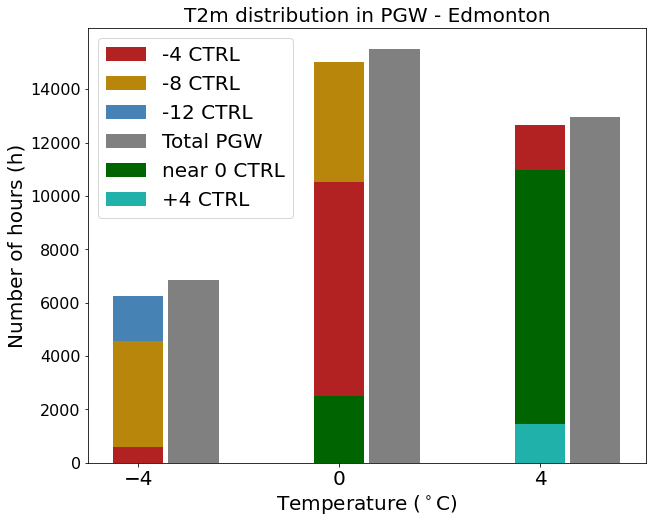

In [65]:
f = plt.figure(figsize=(10, 8))
plt.bar(-4, a2*13, label='-4 CTRL', color='firebrick', width=1)
plt.bar(-4, b2*13, bottom=a2*13, label='-8 CTRL', color='darkgoldenrod', width=1)
plt.bar(-4, c2*13, bottom=(a2+b2)*13, label='-12 CTRL', color='steelblue', width=1)
plt.bar(-2.9, pgw_a, color='gray', width=1, label='Total PGW')
plt.bar(0, a*13, label='near 0 CTRL', color='darkgreen', width=1)
plt.bar(0, b*13, bottom=a*13, color='firebrick', width=1)
plt.bar(0, c*13, bottom=(a+b)*13, color='darkgoldenrod', width=1)
plt.bar(1.1, pgw_b, color='gray', width=1)
plt.bar(4, a1*13, label='+4 CTRL', color='lightseagreen', width=1)
plt.bar(4, b1*13, bottom=a1*13, color='darkgreen', width=1)
plt.bar(4, c1*13, bottom=(a1+b1)*13, color='firebrick', width=1)
plt.bar(5.1, pgw_c, color='gray', width=1)
plt.xlabel(r'Temperature (${\rm ^\circ C}$)', fontsize=20)
plt.ylabel('Number of hours (h)', fontsize=20)
plt.xticks([-4, 0, 4], fontsize=20)
plt.yticks(np.arange(0,16000,2000), fontsize=16)
plt.title('T2m distribution in PGW - Edmonton', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('edmonton_pgw.png')

In [6]:
# Function to get the indexes of a lat/lon in the domain
def geo_idx(dd, dd_array, type="lat"):
  '''
    search for nearest decimal degree in an array of decimal degrees and return the index.
    np.argmin returns the indices of minium value along an axis.
    so subtract dd from all values in dd_array, take absolute value and find index of minimum.
    
    Differentiate between 2-D and 1-D lat/lon arrays.
    for 2-D arrays, should receive values in this format: dd=[lat, lon], dd_array=[lats2d,lons2d]
  '''
  if type == "lon" and len(dd_array.shape) == 1:
    dd_array = np.where(dd_array <= 180, dd_array, dd_array - 360)

  if (len(dd_array.shape) < 2):
    geo_idx = (np.abs(dd_array - dd)).argmin()
  else:
    if (dd_array[1] < 0).any():
      dd_array[1] = np.where(dd_array[1] <= 180, dd_array[1], dd_array[1] - 360)

    a = abs( dd_array[0]-dd[0] ) + abs(  np.where(dd_array[1] <= 180, dd_array[1], dd_array[1] - 360) - dd[1] )
    i,j = np.unravel_index(a.argmin(), a.shape)
    geo_idx = [i,j]

  return geo_idx

In [7]:
def rmse(model, obs):
    mse = np.nanmean((obs.values - model.values)**2)
    return np.sqrt(mse)
def calcNear0Model(df):
    
    maskNear0 = (df['T2 (C)'] > -2) & (df['T2 (C)'] < 2)
    maskNear0_precip = ((df['T2 (C)'] > -2) & (df['T2 (C)'] < 2)) & (df['PR (mm)'] > 0.1)
    maskNear0_precip02 = ((df['T2 (C)'] > -2) & (df['T2 (C)'] < 2)) & (df['PR (mm)'] > 0.2)

    #maskNear0_precip = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Precip. Amount (mm)'] > 0.1)
    #maskNear0_precip02 = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Precip. Amount (mm)'] > 0.2)
    
    near0 = len(df[maskNear0])
    near0_01 = len(df[maskNear0_precip])
    near0_02 = len(df[maskNear0_precip02])
        
    return near0, near0_01, near0_02

def calcNear0(df):
    
    maskNear0 = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2)
    #maskNear0_precip = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Weather'].str.contains("Rain|Snow|Drizzle|Thunderstorm|Showers|Ice")==True)
    maskNear0_precip = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Weather'].str.contains("Rain|Snow|Thunderstorm|Showers|Ice Pellets")==True)

    #maskNear0_precip = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Precip. Amount (mm)'] > 0.1)
    #maskNear0_precip02 = (df['Temp (°C)'] > -2) & (df['Temp (°C)'] < 2) & (df['Precip. Amount (mm)'] > 0.2)
    
    near0 = len(df[maskNear0])
    near0_01 = len(df[maskNear0_precip])
    #near0_02 = len(df[maskNear0_precip02])
        
    return near0, near0_01, near0_01

def calcDist(df):
    l = np.arange(-50,48,4)
    dist = np.zeros(len(l))
    aux = np.full((len(df)), True)
    
    for i in range(len(l)):
      # if first item
        if i == 0:        
            aux = np.where(df<l[i], True, False)
      # last item
        elif i == len(l)-1:
            aux = np.where(df>=l[i], True, False)
        # do something else
      # all the other numbers
        else:
            aux = np.logical_and(df>=l[i-1], df<l[i])
        
        aux = np.sum(aux, axis=0)
        dist[i] += aux
        
    return dist

# Function to find the two peaks in the distribution
def get_2peaks(dist):
    from scipy.signal import find_peaks

    #t = time.process_time()
    peaks, x = find_peaks(dist, height=0, distance=1)

    # get the first and second peak
    heights = x['peak_heights']
    sort_index = np.argsort(heights)
    first = peaks[sort_index[-1]]
    if len(sort_index) == 1:
        second = -1
    else:        
        second = peaks[sort_index[-2]]
    
    return first, second